In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc       # Pra possibilitar o uso do LaTeX na renderização do texto
#from mpl_toolkits.axisartist.axislines import Subplot
from scipy import stats
import matplotlib.pyplot as plt
#import matplotlib as mpl
import pandas as pd

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 6

plt.style.use('default')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Sans'
#plt.rcParams['font.monospace'] = 'Ubuntu Mono'
#rc('font',**{'family':'serif','serif':['Sans']
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [5]:
rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{siunitx}')

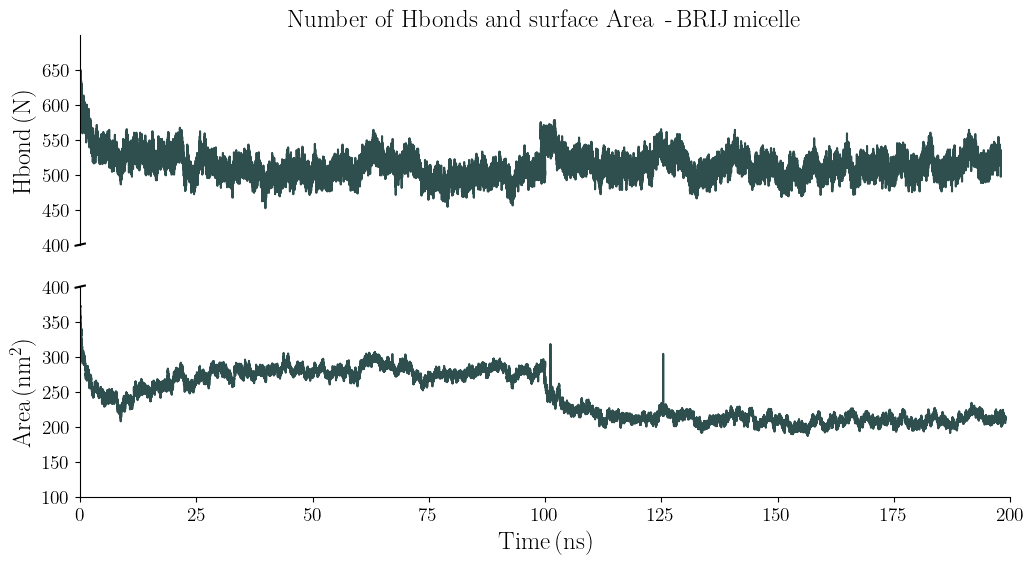

In [21]:
def set_shared_ylabel(a, ylabel, labelpad = 0.01):
    """Set a y label shared by multiple axes
    Parameters
    ----------
    a: list of axes
    ylabel: string
    labelpad: float
        Sets the padding between ticklabels and axis label"""

    f = a[0].get_figure()
    f.canvas.draw() #sets f.canvas.renderer needed below

    # get the center position for all plots
    top = a[0].get_position().y1
    bottom = a[-1].get_position().y0

    # get the coordinates of the left side of the tick labels 
    x0 = 1
    for at in a:
        at.set_ylabel('') # just to make sure we don't and up with multiple labels
        bboxes, _ = at.yaxis.get_ticklabel_extents(f.canvas.renderer)
        bboxes = bboxes.inverse_transformed(f.transFigure)
        xt = bboxes.x0
        if xt < x0:
            x0 = xt
    tick_label_left = x0

    # set position of label
    a[-1].set_ylabel(ylabel)
    a[-1].yaxis.set_label_coords(tick_label_left - labelpad,(bottom + top)/2, transform=f.transFigure)

    
    
    
    



data = pd.read_csv('area_Tp.txt', sep='\s+',header=None,comment='@')
data = pd.DataFrame(data)
x = data[0]*0.001
y = data[1]


data2 = pd.read_csv('area_p_md_3.txt', sep='\s+',header=None,comment='@')
data2 = pd.DataFrame(data2)
x2 = data2[0]*0.001 + 99
y2 = data2[1]


data3 = pd.read_csv('hbond_md_3.txt', sep='\s+',header=None,comment='@')
data3 = pd.DataFrame(data3)
x3 = data3[0]*0.001 +98
y3 = data3[1]

data1 = pd.read_csv('hhh_md_1.txt', sep='\s+',header=None, comment='@')
data1 = pd.DataFrame(data1)
x1 = data1[0]*0.001
y1 = data1[1]




#fig, ax = plt.subplots()
rcParams['figure.figsize'] = 8, 4

#ax = plt.subplot(111)
f, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax.plot(x1,y1, color="darkslategrey")
ax2.plot(x,y, color="darkslategrey")
ax2.plot(x2,y2 , color="darkslategrey")
ax.plot(x3,y3, color="darkslategrey" )


ax.title.set_text(r'Number of Hbonds and surface Area \,-\,BRIJ\,micelle')

ax.set_ylabel('Hbond\,(N)')

ax2.set_ylabel(r'Area\,(\si{\nano\meter\squared}) ')

#plt.plot(x1, y1, color="darkslategrey",marker='o',linestyle='-',linewidth=1.2, markersize=0)





ax.set_ylim(400, 700)  # outliers only
ax2.set_ylim(100, 400)


#ax.set_xlim(0, 100)  # outliers only
ax.set_xlim(0, 200)
ax2.set_xlim(0,200)

ax.set_yticks(np.arange(400, 700, step=50))
ax2.set_yticks(np.arange(100, 450, step=50))

#plt.plot(x, y, color="darkslategrey",marker='o',linestyle='-',linewidth=1.2, markersize=0)

ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

#ax.get_xaxis().tick_bottom()
#ax.get_yaxis().tick_left()






ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()


ax2.tick_params(right= False,top= False)
ax.tick_params(right= False,top= False)

#ax2.xaxis.tick_bottom()


#data2 = pd.read_csv('SDS_S_mindist_md_3.txt', sep='\s+',header=None, comment='@')
#data2 = pd.DataFrame(data2)
#x2 = data2[0]*0.001 + 100
#y2 = data2[1]*10
d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  


#plt.xlim(0,10000)
#plt.ylim(0,7)

#plt.ylabel(r'Rg\,(\si{\angstrom}) ')
plt.xlabel(r' Time\,(ns) ')
#plt.title("Radius \ of \ gyration \ and \ rmsd \ - \ ctac \ micelle  ")
#plt.title(r"Area \,-\,CTAC\,micelle")


#a =(ax,ax2)


#set_shared_ylabel(a, r'Rg\,(\si{\angstrom}) ' )

#plt.savefig("mindist_brij.jpg",dpi=600, bbox_inches='tight')
plt.show()